In [1]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import seaborn as sns
import json
import os
import deepsig

2023-07-24 23:11:36.256276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 23:11:36.331270: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 23:11:36.332101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 23:11:37.459247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def convert_to_json_of_arrays(array_of_jsons):
    json_of_arrays = {}

    # Iterate through each JSON in the array
    for json_obj in array_of_jsons:
        for key, value in json_obj.items():
            # Check if the key exists in the new JSON, if not, create an array
            if key not in json_of_arrays:
                json_of_arrays[key] = []

            # Append the value to the corresponding array
            json_of_arrays[key].append(value)

    return json_of_arrays

In [3]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

In [4]:
def read_json_files_from_folder(folder_path):
    json_list = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .json extension
        if file_name.endswith(".json"):
            file_path = os.path.join(folder_path, file_name)

            # Read the contents of the JSON file
            with open(file_path, "r") as file:
                try:
                    # Parse the JSON data and append it to the list
                    json_data = json.load(file)
                    json_list.append(json_data)
                except json.JSONDecodeError:
                    # Handle parsing errors, if any
                    print(f"Error parsing JSON from file: {file_name}")

    return json_list

In [5]:
compas.replace({'ftl_mlp_initializer': 'Fair Transition Loss', 'adversarial_debiasing_initializer': 'Adversarial Debiasing', 'gerry_fair_classifier_initializer': 'Gerry Fair Classifier', 'prejudice_remover_initializer': 'Prejudice Remover', 'simple_mlp_initializer': 'Standard MLP (baseline)'}, inplace=True)

NameError: name 'compas' is not defined

In [6]:
cols = ['method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'f1_score', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [42]:
compas[cols].sort_values(by=['fitness_rule','fitness'], ascending=False)

,method,fitness_rule,fitness,ACC,MCC,f1_score,avg_odds_diff,stat_par_diff,eq_opp_diff
1,Fair Transition Loss,mcc_parity,0.169952,0.628849,0.249883,0.694259,0.060194,0.079931,0.041296
2,Adversarial Debiasing,mcc_parity,0.143517,0.675851,0.339416,0.716312,0.156033,0.195899,0.140335
4,Gerry Fair Classifier,mcc_parity,0.103318,0.496759,0.164778,0.222778,0.049431,0.061460,0.068299
3,Prejudice Remover,mcc_parity,-0.290903,0.360616,-0.255477,0.313316,0.085892,0.035426,0.059356
0,Standard MLP (baseline),mcc_parity,-0.533013,0.312804,-0.368243,0.287395,0.125814,0.164770,0.064213
12,Adversarial Debiasing,mcc_opportunity,0.259941,0.654781,0.292343,0.706207,0.048583,0.042196,0.032402
11,Fair Transition Loss,mcc_opportunity,0.187277,0.607780,0.238862,0.725000,0.113301,0.114227,0.051585
14,Gerry Fair Classifier,mcc_opportunity,0.169223,0.600486,0.223576,0.703191,0.080748,0.094104,0.054353
13,Prejudice Remover,mcc_opportunity,-0.360755,0.319287,-0.358316,0.233577,0.040563,0.087298,0.002439
10,Standard MLP (baseline),mcc_opportunity,-0.439399,0.337925,-0.309614,0.298712,0.205012,0.210190,0.129784


In [18]:
fitness_rules = compas['fitness_rule'].unique().tolist()
fitness_rules

NameError: name 'compas' is not defined

In [44]:
fitness_rules_target_metrics = {
    'mcc_parity': {'performance': 'MCC', 'fairness': 'stat_par_diff'},
    'mcc_opportunity': {'performance': 'MCC', 'fairness': 'eq_opp_diff'},
    'mcc_odds': {'performance': 'MCC', 'fairness': 'avg_odds_diff'},
    'acc_parity': {'performance': 'ACC', 'fairness': 'stat_par_diff'},
    'acc_opportunity': {'performance': 'ACC', 'fairness': 'eq_opp_diff'},
    'acc_odds': {'performance': 'ACC', 'fairness': 'avg_odds_diff'}
}

In [45]:
for fitness_rule, metrics in fitness_rules_target_metrics.items():
    compas[compas['fitness_rule'] == fitness_rule][['method', 'fitness', metrics['performance'], metrics['fairness']]].sort_values(by=['fitness'], ascending=False)

In [46]:
compas[compas['fitness_rule'] == 'mcc_parity'][['method', 'fitness', 'MCC', 'stat_par_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,stat_par_diff
1,Fair Transition Loss,0.169952,0.249883,0.079931
2,Adversarial Debiasing,0.143517,0.339416,0.195899
4,Gerry Fair Classifier,0.103318,0.164778,0.061460
3,Prejudice Remover,-0.290903,-0.255477,0.035426
0,Standard MLP (baseline),-0.533013,-0.368243,0.164770


In [47]:
compas[compas['fitness_rule'] == 'mcc_opportunity'][['method', 'fitness', 'MCC', 'eq_opp_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,eq_opp_diff
12,Adversarial Debiasing,0.259941,0.292343,0.032402
11,Fair Transition Loss,0.187277,0.238862,0.051585
14,Gerry Fair Classifier,0.169223,0.223576,0.054353
13,Prejudice Remover,-0.360755,-0.358316,0.002439
10,Standard MLP (baseline),-0.439399,-0.309614,0.129784


In [48]:
compas[compas['fitness_rule'] == 'mcc_odds'][['method', 'fitness', 'MCC', 'avg_odds_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,MCC,avg_odds_diff
7,Adversarial Debiasing,0.297425,0.337563,0.040138
6,Fair Transition Loss,0.255468,0.307799,0.052332
9,Gerry Fair Classifier,0.213220,0.326881,0.113662
8,Prejudice Remover,-0.359750,-0.256193,0.103557
5,Standard MLP (baseline),-0.517709,-0.281675,0.236034


In [49]:
compas[compas['fitness_rule'] == 'acc_parity'][['method', 'fitness', 'ACC', 'stat_par_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,stat_par_diff
16,Fair Transition Loss,0.609468,0.667747,0.058279
19,Gerry Fair Classifier,0.507790,0.660454,0.152663
17,Adversarial Debiasing,0.412728,0.674230,0.261502
18,Prejudice Remover,0.291391,0.354943,0.063552
15,Standard MLP (baseline),0.148130,0.346840,0.198710


In [50]:
compas[compas['fitness_rule'] == 'acc_odds'][['method', 'fitness', 'ACC', 'avg_odds_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,avg_odds_diff
21,Fair Transition Loss,0.577921,0.626418,0.048498
22,Adversarial Debiasing,0.562526,0.685575,0.123049
24,Gerry Fair Classifier,0.545642,0.658023,0.112381
23,Prejudice Remover,0.289042,0.371151,0.082109
20,Standard MLP (baseline),0.121104,0.347650,0.226546


In [51]:
compas[compas['fitness_rule'] == 'acc_opportunity'][['method', 'fitness', 'ACC', 'eq_opp_diff']].sort_values(by=['fitness'], ascending=False)

,method,fitness,ACC,eq_opp_diff
27,Adversarial Debiasing,0.626048,0.645057,0.019009
26,Fair Transition Loss,0.610690,0.638574,0.027884
29,Gerry Fair Classifier,0.577442,0.650729,0.073288
28,Prejudice Remover,0.318564,0.356564,0.038000
25,Standard MLP (baseline),0.242709,0.358995,0.116286


In [52]:
resume = pd.pivot_table(compas, values='fitness', index='method', columns='fitness_rule')
resume

fitness_rule,acc_odds,acc_opportunity,acc_parity,mcc_odds,mcc_opportunity,mcc_parity
method,,,,,,
Adversarial Debiasing,0.562526,0.626048,0.412728,0.297425,0.259941,0.143517
Fair Transition Loss,0.577921,0.610690,0.609468,0.255468,0.187277,0.169952
Gerry Fair Classifier,0.545642,0.577442,0.507790,0.213220,0.169223,0.103318
Prejudice Remover,0.289042,0.318564,0.291391,-0.359750,-0.360755,-0.290903
Standard MLP (baseline),0.121104,0.242709,0.148130,-0.517709,-0.439399,-0.533013


/tmp/ipykernel_911801/3059069524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
/tmp/ipykernel_911801/3059069524.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
/tmp/ipykernel_911801/3059069524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
/tmp/ipykernel_911801/3059069524.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
/tmp/ipykernel_911801/30

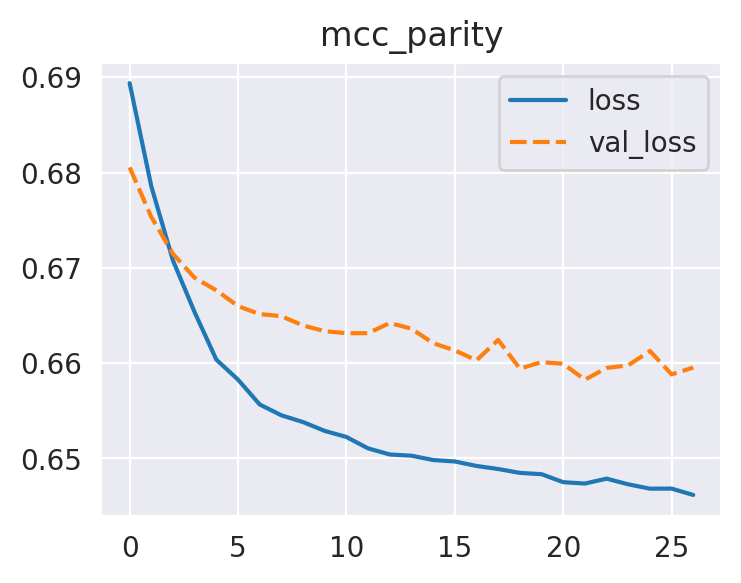

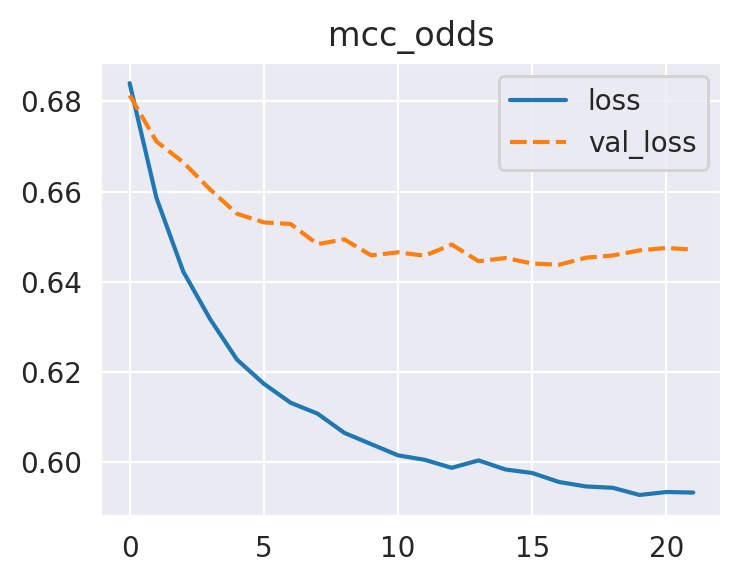

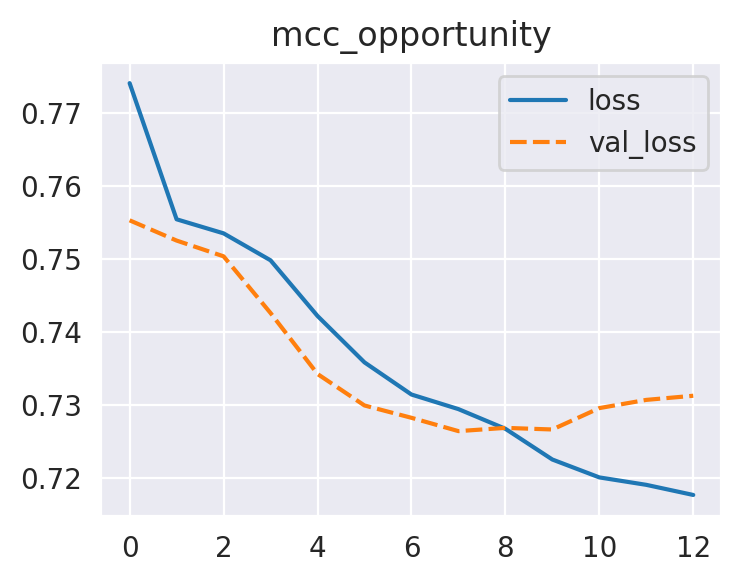

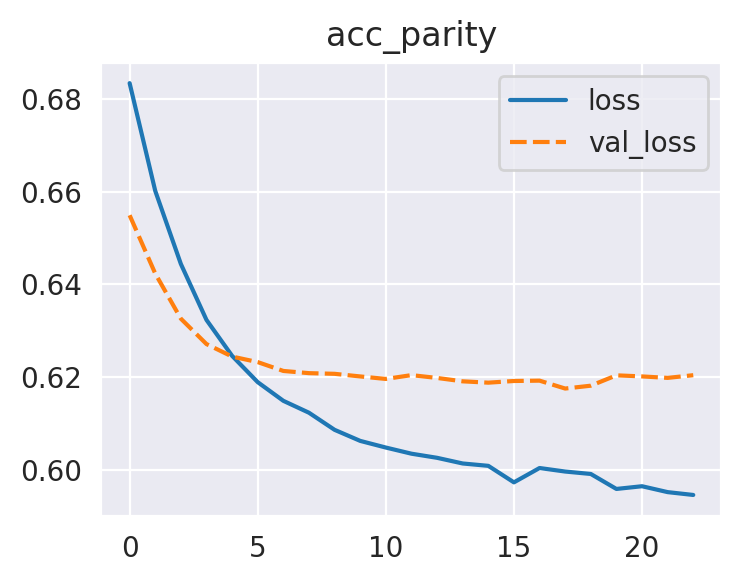

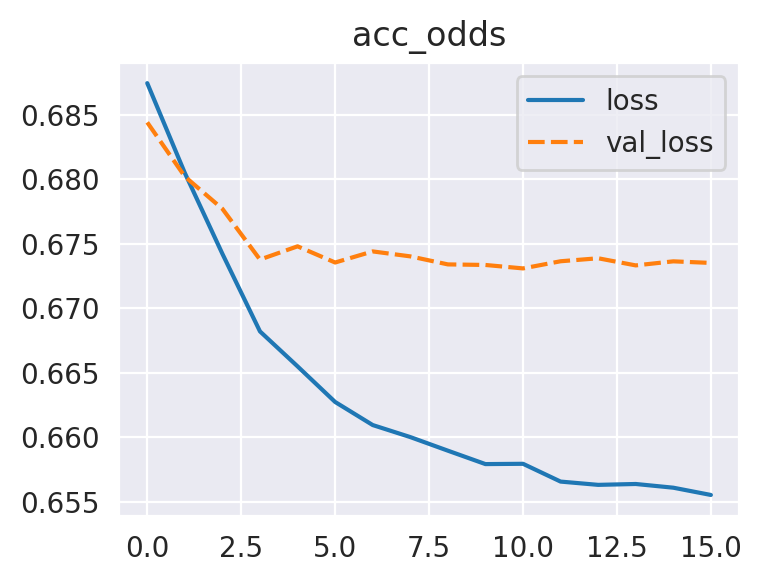

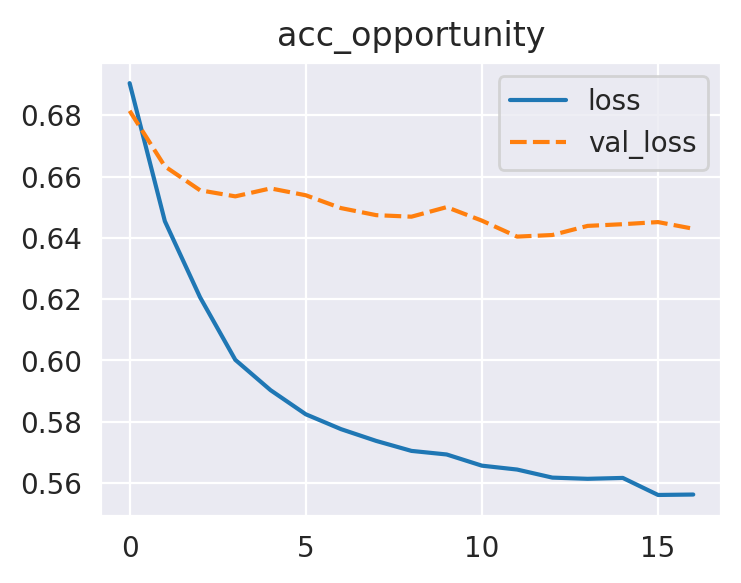

In [53]:
for fitness_rule in fitness_rules:
    tf_history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['best_solution_tf_history']
    solution = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['solution'].iloc[0]
    tf_history = json.loads(tf_history.iloc[0].replace('\'', '\"'))
    fig, ax = plt.subplots(figsize=(4, 3), dpi = 200)
    sns.lineplot(tf_history, ax=ax).set(title=fitness_rule)

/tmp/ipykernel_911801/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_911801/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
/tmp/ipykernel_911801/1687407410.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\


JSONDecodeError: Expecting value: line 1 column 3493 (char 3492)

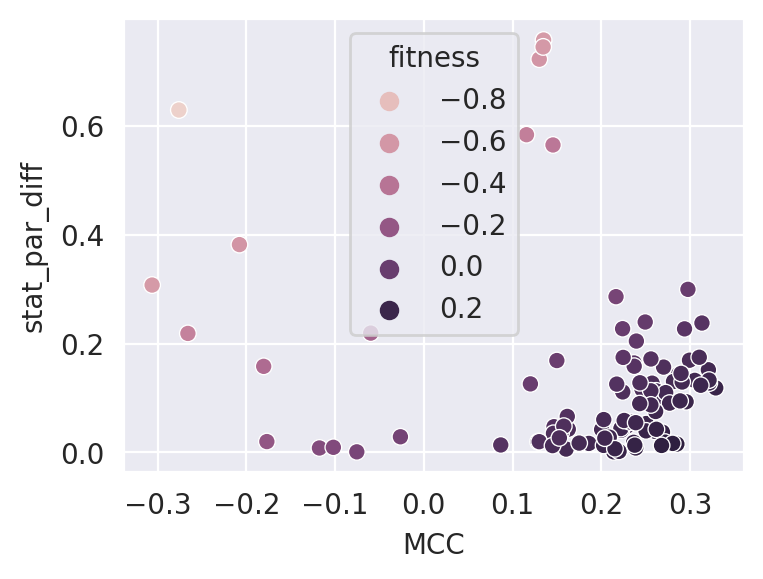

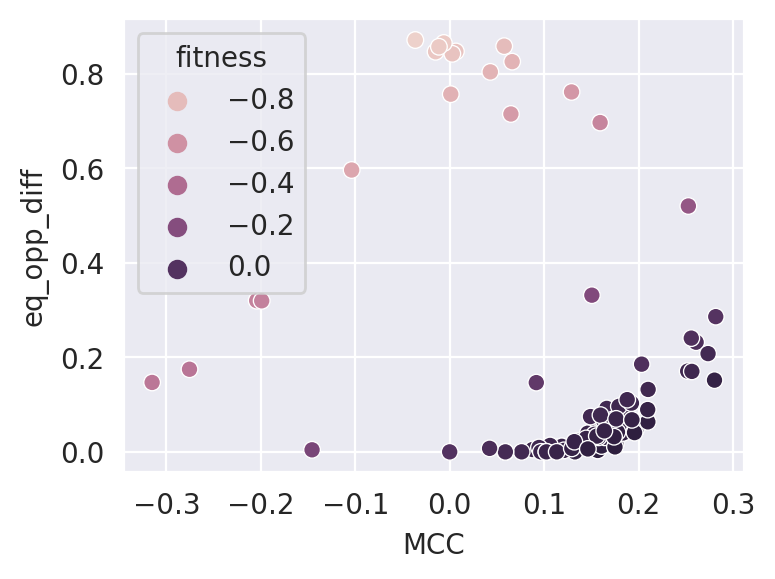

In [54]:
for fitness_rule, metrics in fitness_rules_target_metrics.items():
    compas[compas['fitness_rule'] == fitness_rule][['method', 'fitness', metrics['performance'], metrics['fairness']]].sort_values(by=['fitness'], ascending=False)

    history = compas[compas['fitness_rule'] == fitness_rule][compas['method'] == 'Fair Transition Loss']['tune_results_history']\
                .iloc[0].replace('\'','\"').replace('inf','0')
    history = json.loads(history)
    fig, ax = plt.subplots(figsize=(4, 3), dpi = 200)
    sns.scatterplot(convert_to_json_of_arrays(history), x=fitness_rules_target_metrics[fitness_rule]['performance'],
                    y=fitness_rules_target_metrics[fitness_rule]['fairness'], hue='fitness')

In [5]:
# Replace "folder_path" with the actual path to your folder containing JSON files
results = read_json_files_from_folder('results')
#compas_results = convert_to_json_of_arrays(compas_results)
results = [item for sublist in results for item in sublist]

In [5]:
results = read_csv_files_from_folder('results')
results

,Unnamed: 0,overall_acc,bal_acc,avg_odds_diff,disp_imp,stat_par_diff,eq_opp_diff,theil_ind,f1_score,TPR,...,FOR,ACC,MCC,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history
0,0,0.853400,0.772802,0.080015,0.338451,0.171448,0.089764,0.120182,0.675000,0.612544,...,0.120754,0.853400,0.586696,0.415248,{'dropout': 0.1488213463682999},"[{'overall_acc': 0.8413488114980652, 'bal_acc'...",mcc_parity,simple_mlp_initializer,adult_dataset_reader,"{'loss': [0.41084792382751767, 0.3570570611890..."
1,1,0.825981,0.726325,0.203915,1.109913,0.019953,0.333080,0.146104,0.601317,0.528260,...,0.144336,0.825981,0.500536,0.480583,"{'dropout': 0.03265052452351749, 'privileged_d...","[{'overall_acc': 0.4210889994472084, 'bal_acc'...",mcc_parity,ftl_mlp_initializer,adult_dataset_reader,"{'loss': [0.47219302671090174, 0.4390555553218..."
2,2,0.827750,0.695941,0.170357,0.942674,0.008196,0.309560,0.163735,0.555365,0.435347,...,0.162294,0.827750,0.486696,0.478500,{'adversary_loss_weight': 0.3922262699821567},"[{'overall_acc': 0.8302929795467109, 'bal_acc'...",mcc_parity,adversarial_debiasing_initializer,adult_dataset_reader,NaN
3,3,0.824765,0.740752,0.156716,0.935666,0.013875,0.257080,0.139173,0.622169,0.570866,...,0.137472,0.824765,0.512801,0.498926,{'eta': 21.4395884633793},"[{'overall_acc': 0.822277501381979, 'bal_acc':...",mcc_parity,prejudice_remover_initializer,adult_dataset_reader,NaN
4,4,0.739414,0.797105,0.215304,0.362278,0.371594,0.146243,0.075820,0.630854,0.910077,...,0.040837,0.739414,0.512430,0.140836,"{'C': 1.0345715487720044, 'gamma': 0.01}","[{'overall_acc': 0.83595909342178, 'bal_acc': ...",mcc_parity,gerry_fair_classifier_initializer,adult_dataset_reader,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,25,0.852736,0.776522,0.032846,0.388373,0.160795,0.001531,0.115084,0.673689,0.629003,...,0.113442,0.852736,0.581666,0.851205,{'dropout': 0.0043869367282519224},"[{'overall_acc': 0.8454947484798231, 'bal_acc'...",acc_opportunity,simple_mlp_initializer,adult_dataset_reader,"{'loss': [0.38556268092415, 0.3363742627719026..."
774,26,0.837479,0.782958,0.050428,0.424477,0.176829,0.024213,0.111816,0.672460,0.675168,...,0.106890,0.837479,0.564398,0.813266,"{'dropout': 0.18094438096604942, 'privileged_d...","[{'overall_acc': 0.7994748479823107, 'bal_acc'...",acc_opportunity,ftl_mlp_initializer,adult_dataset_reader,"{'loss': [0.43217717875093253, 0.3988633977352..."
775,27,0.848977,0.762294,0.051293,0.441320,0.134065,0.056000,0.125257,0.658841,0.591215,...,0.125413,0.848977,0.569623,0.792977,{'adversary_loss_weight': 0.0006190798728882424},"[{'overall_acc': 0.8188225538971807, 'bal_acc'...",acc_opportunity,adversarial_debiasing_initializer,adult_dataset_reader,NaN
776,28,0.845550,0.764002,0.027326,0.417448,0.145355,0.002915,0.129761,0.666189,0.594710,...,0.131871,0.845550,0.574608,0.842635,{'eta': 0.43671873092617697},"[{'overall_acc': 0.8452183526810393, 'bal_acc'...",acc_opportunity,prejudice_remover_initializer,adult_dataset_reader,NaN


In [6]:
results.groupby(['dataset','fitness_rule', 'method']).agg({'fitness': ['mean', 'std','count'], 'MCC': ['mean', 'std'], 'ACC': ['mean', 'std'], 'avg_odds_diff': ['mean', 'std'], 'eq_opp_diff': ['mean', 'std'], 'stat_par_diff': ['mean', 'std']}).sort_values(by=['dataset','fitness_rule', ('fitness','mean')])

fitness  \
                                                                             mean   
dataset               fitness_rule    method                                        
adult_dataset_reader  acc_odds        gerry_fair_classifier_initializer  0.702990   
                                      simple_mlp_initializer             0.762733   
                                      prejudice_remover_initializer      0.794090   
                                      adversarial_debiasing_initializer  0.797411   
                                      ftl_mlp_initializer                0.808467   
                      acc_opportunity gerry_fair_classifier_initializer  0.683905   
                                      adversarial_debiasing_initializer  0.750086   
                                      simple_mlp_initializer             0.756940   
                                      ftl_mlp_initializer                0.800230   
                                      prejudice_remover_initializer      0.809937   
                      acc_parity      gerry_fair_classifier_initializer  0.524004   
                                      simple_mlp_initializer             0.664718   
                                      prejudice_remover_initializer      0.807088   
                                      adversarial_debiasing_initializer  0.808253   
                                      ftl_mlp_initializer                0.815658   
                      mcc_odds        gerry_fair_classifier_initializer  0.404155   
                                      simple_mlp_initializer             0.482897   
                                      prejudice_remover_initializer      0.502452   
                                      adversarial_debiasing_initializer  0.508096   
                                      ftl_mlp_initializer                0.524488   
                      mcc_opportunity gerry_fair_classifier_initializer  0.369648   
                                      adversarial_debiasing_initializer  0.486083   
                                      prejudice_remover_initializer      0.490160   
                                      simple_mlp_initializer             0.491773   
                                      ftl_mlp_initializer                0.554315   
                      mcc_parity      gerry_fair_classifier_initializer  0.314813   
                                      simple_mlp_initializer             0.397810   
                                      adversarial_debiasing_initializer  0.476773   
                                      prejudice_remover_initializer      0.490187   
                                      ftl_mlp_initializer                0.490350   
compas_dataset_reader acc_odds        simple_mlp_initializer             0.154593   
                                      prejudice_remover_initializer      0.264117   
                                      gerry_fair_classifier_initializer  0.518907   
                                      adversarial_debiasing_initializer  0.552610   
                                      ftl_mlp_initializer                0.571804   
                      acc_opportunity simple_mlp_initializer             0.217957   
                                      prejudice_remover_initializer      0.286772   
                                      gerry_fair_classifier_initializer  0.551639   
                                      adversarial_debiasing_initializer  0.594049   
                                      ftl_mlp_initializer                0.594341   
                      acc_parity      simple_mlp_initializer             0.145627   
                                      prejudice_remover_initializer      0.307630   
                                      gerry_fair_classifier_initializer  0.482351   
                                      ftl_mlp_initializer                0.501417   
                                      adversarial_debiasing_initializer  0.5377

In [13]:
A = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
A

/tmp/ipykernel_1302794/1507346428.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
/tmp/ipykernel_1302794/1507346428.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()


[0.8137609607533545,
 0.8321866016945392,
 0.8132257551938313,
 0.819521916263635,
 0.8032495648587579,
 0.7930578299230271,
 0.8093693583495905,
 0.8015646205819671,
 0.8265659246189934,
 0.8098408743655104,
 0.7707898362369274]

In [14]:
B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'simple_mlp_initializer']['fitness'].tolist()
B

/tmp/ipykernel_1302794/11301003.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'simple_mlp_initializer']['fitness'].tolist()
/tmp/ipykernel_1302794/11301003.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'simple_mlp_initializer']['fitness'].tolist()


[0.7350463694418156,
 0.7693703676347926,
 0.7785412128436195,
 0.7282171312981689,
 0.7864416889175945,
 0.7592562921210109,
 0.7756043886955066,
 0.7761428198749887,
 0.7592432441392615,
 0.7647352777592026,
 0.7574630468790631]

In [15]:
deepsig.aso(A, B)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:05<00:00, 189.65it/s]


0.00019119118973013574

In [16]:
B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'adversarial_debiasing_initializer']['fitness'].tolist()
B

/tmp/ipykernel_1302794/3789360131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'adversarial_debiasing_initializer']['fitness'].tolist()
/tmp/ipykernel_1302794/3789360131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == 'adult_dataset_reader'][results['fitness_rule'] == 'acc_odds'][results['method'] == 'adversarial_debiasing_initializer']['fitness'].tolist()


[0.7929361285676964,
 0.8171633542222447,
 0.7855351477554995,
 0.7928889329258847,
 0.7851522189631481,
 0.8004858203184314,
 0.8120030632327417,
 0.7976471988677819,
 0.8189491134032916,
 0.7900217036571264,
 0.7787337423469386]

In [17]:
deepsig.aso(A, B)

Bootstrap iterations: 100%|█████████▉| 999/1000 [00:05<00:00, 186.06it/s]


0.3025652167393811

In [20]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [21]:
datasets = results['dataset'].unique().tolist()
datasets

['adult_dataset_reader', 'compas_dataset_reader']

In [22]:
methods = results['method'].unique().tolist()
methods

['simple_mlp_initializer',
 'ftl_mlp_initializer',
 'adversarial_debiasing_initializer',
 'prejudice_remover_initializer',
 'gerry_fair_classifier_initializer']

In [ ]:
d = datasets[1]

data = []
for f in fitness_rules:
    for m in methods:
        A = results[results['dataset'] == d][results['fitness_rule'] == f][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
        B = results[results['dataset'] == d][results['fitness_rule'] == f][results['method'] == m]['fitness'].tolist()
        min_eps = deepsig.aso(A, B)
        data.append({'fitness_rule': f, 'method': m, 'min_eps': min_eps})

In [69]:
df = pd.DataFrame(data)
df = df[df['method'] != 'ftl_mlp_initializer']

<Axes: xlabel='None-method', ylabel='fitness_rule'>

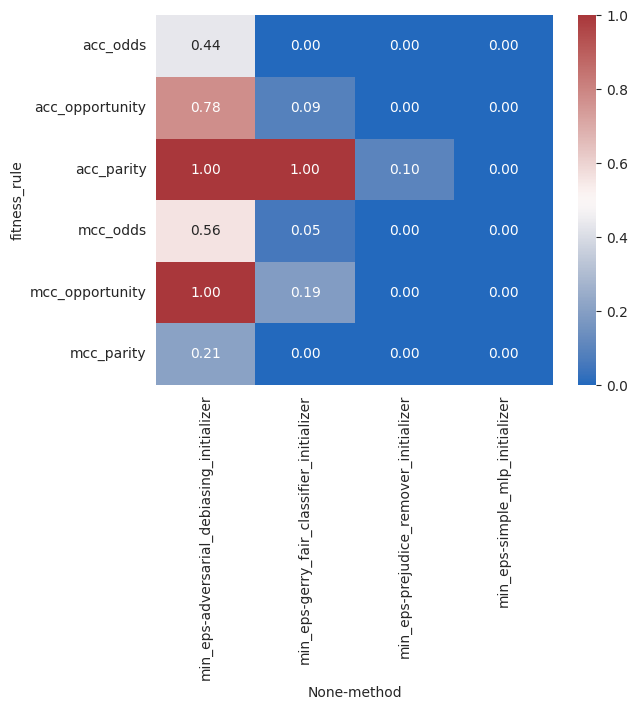

In [70]:
sns.heatmap(df.pivot(columns='method', index='fitness_rule'),annot=True, fmt='.2f', cmap='vlag')

In [58]:
d_2 = datasets[0]

data_2 = []
for f in fitness_rules:
    for m in methods:
        A = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
        B = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == m]['fitness'].tolist()
        min_eps = deepsig.aso(A, B)
        data_2.append({'fitness_ruke': f, 'method': m, 'min_eps': min_eps})

/tmp/ipykernel_1302794/503674013.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
/tmp/ipykernel_1302794/503674013.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == 'ftl_mlp_initializer']['fitness'].tolist()
/tmp/ipykernel_1302794/503674013.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == m]['fitness'].tolist()
/tmp/ipykernel_1302794/503674013.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  B = results[results['dataset'] == d_2][results['fitness_rule'] == f][results['method'] == m]['fitness'].tolist()
Bootstrap iterations: 100%|█████████▉| 9

In [71]:
df_2 = pd.DataFrame(data_2)
df_2 = df_2[df_2['method'] != 'ftl_mlp_initializer']

<Axes: xlabel='None-method', ylabel='fitness_ruke'>

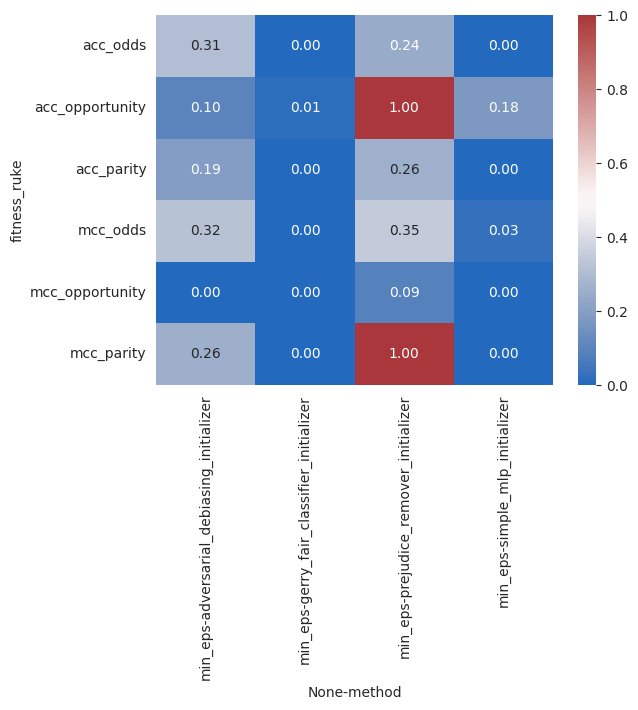

In [72]:
sns.heatmap(df_2.pivot(columns='method', index='fitness_ruke'), annot=True, fmt='.2f', cmap='vlag')



In [63]:
data_2

[{'fitness_ruke': 'mcc_parity',
  'method': 'simple_mlp_initializer',
  'min_eps': 0.0},
 {'fitness_ruke': 'mcc_parity',
  'method': 'ftl_mlp_initializer',
  'min_eps': 1.0},
 {'fitness_ruke': 'mcc_parity',
  'method': 'adversarial_debiasing_initializer',
  'min_eps': 0.2570740564615867},
 {'fitness_ruke': 'mcc_parity',
  'method': 'prejudice_remover_initializer',
  'min_eps': 1.0},
 {'fitness_ruke': 'mcc_parity',
  'method': 'gerry_fair_classifier_initializer',
  'min_eps': 0.0},
 {'fitness_ruke': 'mcc_odds',
  'method': 'simple_mlp_initializer',
  'min_eps': 0.0251198821929594},
 {'fitness_ruke': 'mcc_odds', 'method': 'ftl_mlp_initializer', 'min_eps': 1.0},
 {'fitness_ruke': 'mcc_odds',
  'method': 'adversarial_debiasing_initializer',
  'min_eps': 0.31895788490198423},
 {'fitness_ruke': 'mcc_odds',
  'method': 'prejudice_remover_initializer',
  'min_eps': 0.3506622422204338},
 {'fitness_ruke': 'mcc_odds',
  'method': 'gerry_fair_classifier_initializer',
  'min_eps': 0.0},
 {'fitness_